In [2]:
import matplotlib.pyplot as plt

import numpy as np

import pybullet as p

import time





direct = p.connect(p.GUI)#, options="--window_backend=2 --render_device=0")

#egl = p.loadPlugin("eglRendererPlugin")





p.loadURDF('plane.urdf')

p.loadURDF("r2d2.urdf",[0,0,1])

p.loadURDF('cube_small.urdf', basePosition=[0.0, 0.0, 0.025])

cube_trans = p.loadURDF('cube_small.urdf', basePosition=[0.0, 0.1, 0.025])

p.changeVisualShape(cube_trans,-1,rgbaColor=[1,1,1,0.1])

width = 128

height = 128



fov = 60

aspect = width / height

near = 0.02

far = 1



view_matrix = p.computeViewMatrix([0, 0, 0.5], [0, 0, 0], [1, 0, 0])

projection_matrix = p.computeProjectionMatrixFOV(fov, aspect, near, far)



# Get depth values using the OpenGL renderer

images = p.getCameraImage(width, height, view_matrix, projection_matrix, shadow=True,renderer=p.ER_BULLET_HARDWARE_OPENGL)

rgb_opengl= np.reshape(images[2], (height, width, 4))*1./255.

depth_buffer_opengl = np.reshape(images[3], [width, height])

depth_opengl = far * near / (far - (far - near) * depth_buffer_opengl)

seg_opengl = np.reshape(images[4], [width, height])*1./255.

time.sleep(1)



# Get depth values using Tiny renderer

images = p.getCameraImage(width, height, view_matrix, projection_matrix, shadow=True, renderer=p.ER_TINY_RENDERER)

depth_buffer_tiny = np.reshape(images[3], [width, height])

depth_tiny = far * near / (far - (far - near) * depth_buffer_tiny)

rgb_tiny= np.reshape(images[2], (height, width, 4))*1./255.

seg_tiny = np.reshape(images[4],[width,height])*1./255.







bearStartPos1 = [-3.3,0,0]

bearStartOrientation1 = p.getQuaternionFromEuler([0,0,0])

bearId1 = p.loadURDF("plane.urdf", bearStartPos1, bearStartOrientation1)

bearStartPos2 = [0,0,0]

bearStartOrientation2 = p.getQuaternionFromEuler([0,0,0])

bearId2 = p.loadURDF("teddy_large.urdf",bearStartPos2, bearStartOrientation2)

textureId = p.loadTexture("checker_grid.jpg")

for b in range (p.getNumBodies()):

	p.changeVisualShape(b,linkIndex=-1,textureUniqueId=textureId)

	for j in range(p.getNumJoints(b)):

		p.changeVisualShape(b,linkIndex=j,textureUniqueId=textureId)



viewMat = [0.642787516117096, -0.4393851161003113, 0.6275069713592529, 0.0, 0.766044557094574, 0.36868777871131897, -0.5265407562255859, 0.0, -0.0, 0.8191521167755127, 0.5735764503479004, 0.0, 2.384185791015625e-07, 2.384185791015625e-07, -5.000000476837158, 1.0]

projMat = [0.7499999403953552, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, -1.0000200271606445, -1.0, 0.0, 0.0, -0.02000020071864128, 0.0]

images = p.getCameraImage(width, height, viewMatrix = viewMat, projectionMatrix = projMat, renderer=p.ER_BULLET_HARDWARE_OPENGL, flags=p.ER_USE_PROJECTIVE_TEXTURE, projectiveTextureView=viewMat, projectiveTextureProj=projMat)

proj_opengl= np.reshape(images[2], (height, width, 4))*1./255.

time.sleep(1)



images = p.getCameraImage(width, height, viewMatrix = viewMat, projectionMatrix = projMat, renderer=p.ER_TINY_RENDERER, flags=p.ER_USE_PROJECTIVE_TEXTURE, projectiveTextureView=viewMat, projectiveTextureProj=projMat)

proj_tiny= np.reshape(images[2], (height, width, 4))*1./255.



# Plot both images - should show depth values of 0.45 over the cube and 0.5 over the plane

plt.subplot(4, 2, 1)

plt.imshow(depth_opengl, cmap='gray', vmin=0, vmax=1)

plt.title('Depth OpenGL3')



plt.subplot(4, 2, 2)

plt.imshow(depth_tiny, cmap='gray', vmin=0, vmax=1)

plt.title('Depth TinyRenderer')



plt.subplot(4,2,3)

plt.imshow(rgb_opengl)

plt.title('RGB OpenGL3')



plt.subplot(4,2,4)

plt.imshow(rgb_tiny)

plt.title('RGB Tiny')



plt.subplot(4,2,5)

plt.imshow(seg_opengl)

plt.title('Seg OpenGL3')



plt.subplot(4,2,6)

plt.imshow(seg_tiny)

plt.title('Seg Tiny')



plt.subplot(4,2,7)

plt.imshow(proj_opengl)

plt.title('Proj OpenGL')



plt.subplot(4,2,8)

plt.imshow(proj_tiny)

plt.title('Proj Tiny')

plt.subplots_adjust(hspace=0.7)





plt.show()

error: Only one local in-process GUI/GUI_SERVER connection allowed. Use DIRECT connection mode or start a separate GUI physics server (ExampleBrowser, App_SharedMemoryPhysics_GUI, App_SharedMemoryPhysics_VR) and connect over SHARED_MEMORY, UDP or TCP instead.

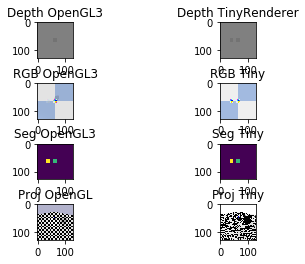

In [3]:
plt.subplot(4, 2, 1)

plt.imshow(depth_opengl, cmap='gray', vmin=0, vmax=1)

plt.title('Depth OpenGL3')



plt.subplot(4, 2, 2)

plt.imshow(depth_tiny, cmap='gray', vmin=0, vmax=1)

plt.title('Depth TinyRenderer')



plt.subplot(4,2,3)

plt.imshow(rgb_opengl)

plt.title('RGB OpenGL3')



plt.subplot(4,2,4)

plt.imshow(rgb_tiny)

plt.title('RGB Tiny')



plt.subplot(4,2,5)

plt.imshow(seg_opengl)

plt.title('Seg OpenGL3')



plt.subplot(4,2,6)

plt.imshow(seg_tiny)

plt.title('Seg Tiny')



plt.subplot(4,2,7)

plt.imshow(proj_opengl)

plt.title('Proj OpenGL')



plt.subplot(4,2,8)

plt.imshow(proj_tiny)

plt.title('Proj Tiny')

plt.subplots_adjust(hspace=0.7)





plt.show()